# Data analysis
> @author: chaimdemulder  
> @copyright: (c) 2015, Chaïm De Mulder

This notebook describes the analysis of data obtained during experiments to establish the effect of dissolved oxygen on Anoxic Ammonia Oxidising Bacteria (AnAOB). For a detailed description of the experiments, the reader is referred to the paper describing the results of these experiments.

## Load necessary packages and code

In [45]:
import sys
import os
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt   #plotten in python

from os import listdir
from datetime import timedelta

%matplotlib inline

In [46]:
%run Functions

DataAnalysisFcns.py loaded
DataReadingFcns.py loaded
TimeConversionFcns.py loaded


## SCRIPT

### Read data

In [47]:
data = join_dir_files('./data',ext='csv',comment='#')

File  RB-2016-02-24-17-21-01.csv  has 0 header lines, adding data to dataframe with columns Index(['TheTime', 'B_DO', 'B_K', 'B_LevelControl_in', 'B_LevelControl_out',
       'B_MFC', 'B_NH4', 'B_pH', 'B_Pump_acid', 'B_Pump_base',
       'B_Pump_effluent', 'B_Pump_effluent_speed', 'B_Pump_influent',
       'B_Pump_influent_speed', 'B_Stirrer', 'B_T_DO', 'B_T_ISE',
       'B_Valve_air', 'B_Valve_N2', 'B_slopeNH4'],
      dtype='object')
File  RB-2016-02-24-18-40-19.csv  has 0 header lines, adding data to dataframe with columns Index(['TheTime', 'B_DO', 'B_K', 'B_LevelControl_in', 'B_LevelControl_out',
       'B_MFC', 'B_NH4', 'B_pH', 'B_Pump_acid', 'B_Pump_base',
       'B_Pump_effluent', 'B_Pump_effluent_speed', 'B_Pump_influent',
       'B_Pump_influent_speed', 'B_Stirrer', 'B_T_DO', 'B_T_ISE',
       'B_Valve_air', 'B_Valve_N2', 'B_slopeNH4'],
      dtype='object')
File  RB-2016-02-24-20-00-03.csv  has 0 header lines, adding data to dataframe with columns Index(['TheTime', 'B_DO', 'B

### Some plotting

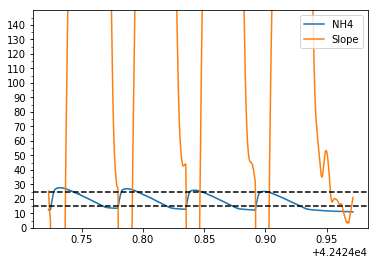

In [48]:
fig, ax1 = plt.subplots()
ax1.set_zorder(ax2.get_zorder()+1) # put ax1 in front of ax2 
ax1.patch.set_visible(False) # hide the 'canvas' 

ax1.plot(data['TheTime'],data['B_NH4'],label='NH4')
ax1.plot(data['TheTime'],data['B_slopeNH4']*3600*24,label='Slope')
ax1.set_ylim(0,150)

ax1.axhline(25, color='k', linestyle='--')#to define upper limit of slope extraction
ax1.axhline(15, color='k', linestyle='--')#to define lower limit of slope extraction
major_ticks = np.arange(0,150,10)                                              
minor_ticks = np.arange(0,150,5)                                               
                  
ax1.set_yticks(major_ticks)                                                       
ax1.set_yticks(minor_ticks, minor=True) 
 
plt.legend(loc=1)

(0, 0.0007)

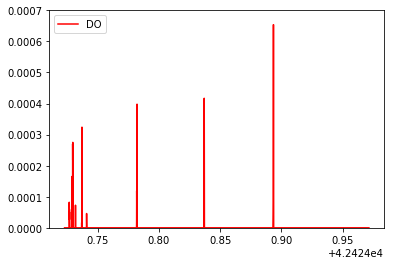

In [49]:
fig, ax2 = plt.subplots()
ax2.plot(data['TheTime'],data['B_DO'],label='DO',color='r')
ax2.set_ylim(0,2)
ax2.legend(loc=2)
ax2.set_ylim(0,0.0007)

### Data analysis

In [50]:
#define the arguments of the extract_slopes function
path = './data'
file_extension = 'csv'
time_column = 'TheTime'
data_column = 'B_NH4'
filter_function = moving_slope_filter
cutoff_value = 1000
comment = '#'
slope_direction_down = True
lower_data_limit = 15
upper_data_limit = 25
time_unit = 'd'
delta_t = timedelta(minutes=10)
schrikkeljaar = True
plot_parameters = [True,(-1000,-750,-500,-250,-200,-150,-100,-50,0)]

The extract slopes function (and all the other functions it uses) can be found in the Functions.py file, loaded at the beginning of this notebook. For a quick explanation of the function arguments, put the cursor within the brackets of the extract_slopes function and hit shift+tab.  
The figures generated here are also saved in a new folder 'figures' in the same folder as this notebook.

Reading 4 files...
Creating log-file at ./data/log.md


/Users/chaimdemulder/Documents/Work/github/2017_AnammoxInhibitionPaper/Functions.py:428: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  fig_hist.hold(True)
/Users/chaimdemulder/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


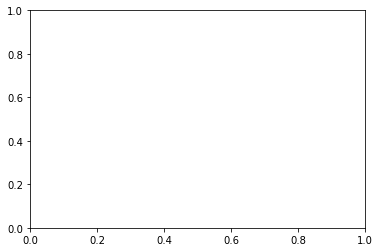

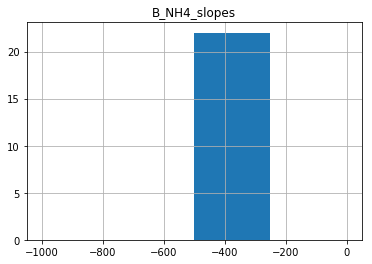

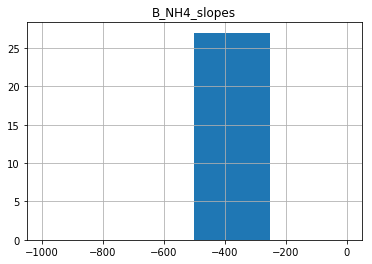

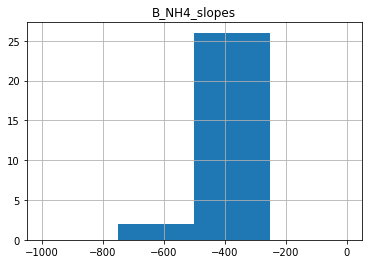

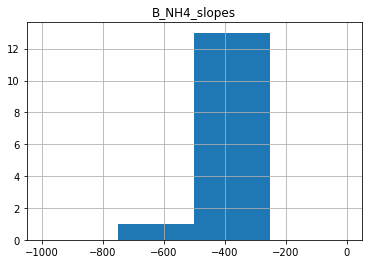

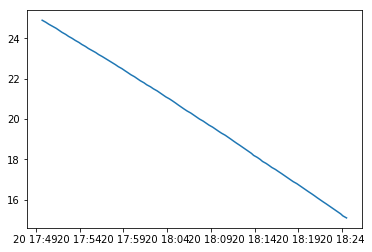

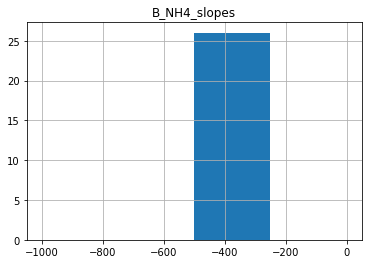

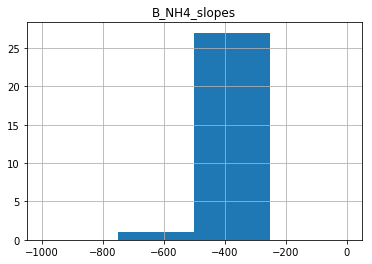

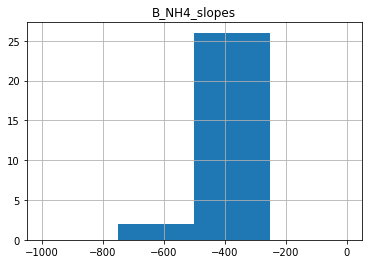

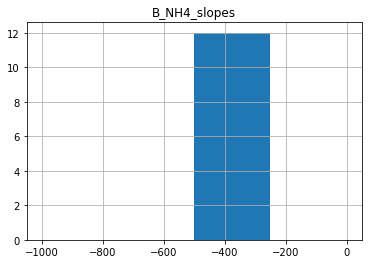

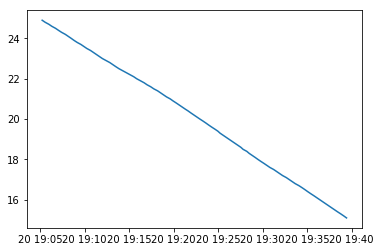

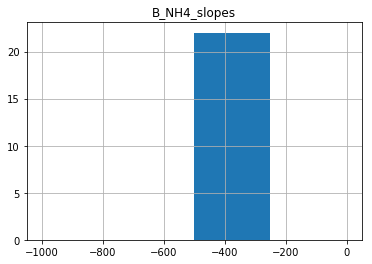

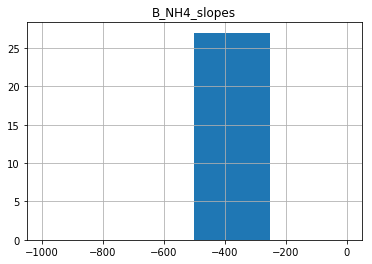

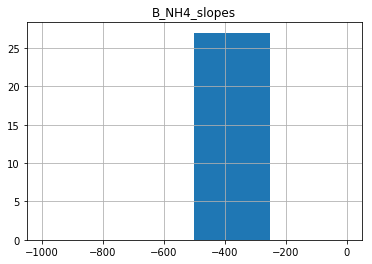

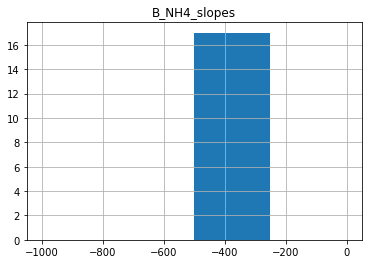

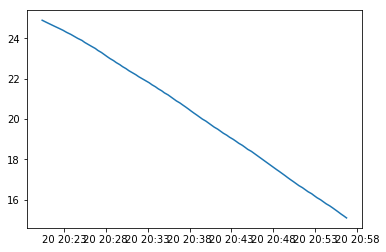

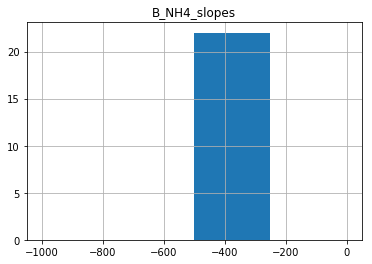

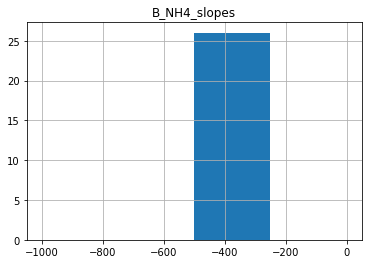

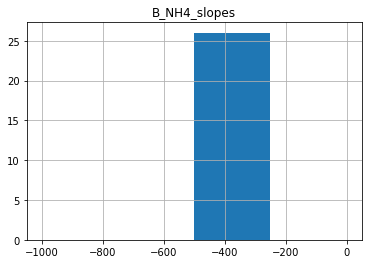

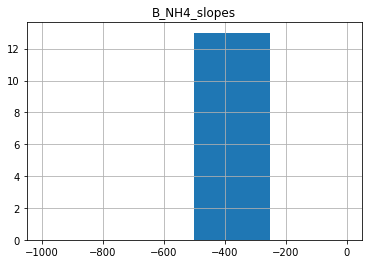

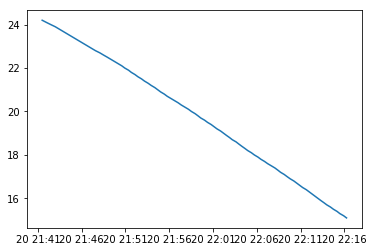

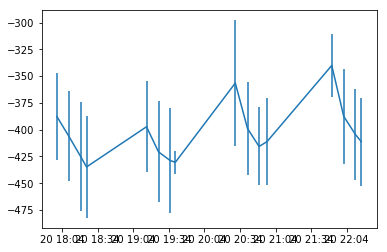

In [52]:
slopes,figure,axes = extract_slopes(path,time_column,data_column,filter_function,cutoff_value,file_extension,
                                    comment,slope_direction_down,[lower_data_limit,upper_data_limit],time_unit,
                                    delta_t,schrikkeljaar,plot_parameters)

### Save the calculated slope values

In [53]:
slopes.to_csv('./slopes.csv', sep='\t')